In [1]:
import tweepy
import pandas as pd
import authentification
import datetime

In [2]:
screen_name = "1O17SQD"
TWEET_MODE = 'extended'
api = authentification.credentials()

def get_tweets(screen_name, api):
    """
    Retrieves tweets from the specified user using the specified Twitter API.

    Parameters
    ----------
    screen_name : str
        Screen name of the user whose tweets are to be retrieved.
    api: tweepy.API
        Twitter API object used to access the user's tweets.

    Returns
    -------
    list of tweepy.models.Status
        List of the user's tweets.
    """
    tweets = api.user_timeline(screen_name=screen_name,
                               # 200 is the maximum number allowed
                               count=200,
                               exclude_replies=False,
                               include_rts=False,
                               # Necessary to keep the full text
                               # otherwise only the first 140 words are extracted
                               tweet_mode=TWEET_MODE
                               )
    return tweets

def get_all_tweets(screen_name, api):
    """
    Retrieves all tweets from the specified user using the specified Twitter API.

    Parameters
    ----------
    screen_name : str
        Screen name of the user whose tweets are to be retrieved.
    api: tweepy.API
        Twitter API object used to access the user's tweets.

    Returns
    -------
    list of tweepy.models.Status
        List of all the user's tweets.
    """
    tweets = get_tweets(screen_name, api)
    all_tweets = []
    all_tweets.extend(tweets)
    oldest_id = tweets[-1].id
    while True:
        tweets = api.user_timeline(screen_name=screen_name,
                                   # 200 is the maximum number allowed
                                   count=200,
                                   exclude_replies=False,
                                   include_rts=False,
                                   max_id=oldest_id - 1,
                                   # Necessary to keep the full text
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode=TWEET_MODE
                                   )
        if not len(tweets):
            break
        oldest_id = tweets[-1].id
        all_tweets.extend(tweets)

    return all_tweets

In [3]:
import re
import unicodedata
from nltk.tokenize import WordPunctTokenizer

In [4]:
def cleaning_tweets(tweets):
    """
    Clean up a tweet by removing links, hashtags, mentions and emoticons.

    Parameters
    ----------
    tweet : str
        Tweet to clean up.

    Returns
    -------
    str
        Tweet cleaned up.
    """
    regex_pattern = re.compile(pattern="["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictograms
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    tweets = re.sub(regex_pattern, '', tweets)  # replaces the pattern with ''
    tweets = re.sub(pattern, '', tweets)
    tweets = re.sub(r'@[^\s]+', '', tweets)
    tweets = re.sub(r'#[^\s]+', '', tweets)
    # Removes special characters and links
    #tweets = re.sub(r'[^\w\s]', '', tweets)
    tweets = re.sub(r'https?://[A-Za-z0-9./]+', '', tweets)
    # Removes user mentions
    tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)

    token = WordPunctTokenizer()
    words = token.tokenize(tweets)
    result_words = [x for x in words]
    return " ".join(result_words)

def remove_emojis(tweets):
    text = cleaning_tweets(tweets)
    # Create an empty list to store the cleaned text
    cleaned_text = []

    # Scroll through each character of the text
    for character in text:
        # Use the `category` function of the `unicodedata` library to get the Unicode category of the character
        character_category = unicodedata.category(character)
        # If the character's Unicode category is not "So" (Symbol, Other), add the character to the clean text list
        if character_category != "So":
            cleaned_text.append(character)

    # Join the characters in the cleaned text list into a string and return it
    return "".join(cleaned_text)

In [19]:
def process_tweets(tweets):
    """
    Processes tweets by removing empty words.

    Parameters
    ----------
    tweets : list of str
        List of tweets to process.

    Returns
    -------
    list of str
        List of processed tweets.
    """
    with open("french_stopwords.txt", "r", encoding="utf-8") as stopwords_file:
        stopwords = []
        for line in stopwords_file:
            word = line.split("|")[0].strip()
            stopwords.append(word)

    cleaned_tweets = []
    for tweet in tweets.lower().split():
        if (tweet not in stopwords) and (len(tweet) > 1):
            cleaned_tweets.append(remove_emojis(tweet))
                      
    return cleaned_tweets

In [48]:
' '.join(list(df[(df["year"] >= 2020) & (df["year"] <= 2023)].tweets_txt))

'je pense qu\'on ne m\'aime pas, mais je ne suis pas sûr 🤣 https://t.co/dk5WPoK9J1 Chat GPT, Google Bard… : l’intelligence artificielle va-t-elle nous remp... https://t.co/PrWWCjaZKN j\'ai drop quelques projets sur mon github, dans mes langues les plus utilisées j\'ai 70% de CSS 🙄 https://t.co/4UIVtJrAUQ j\'ai regardé inception lors d\'un déplacement pro, j\'ai dû mettre pause plusieurs fois, ce qui est assez chiant, je veux le regarder en one shot ! j\'ai perdu l\'habitude d\'aller au cinéma tous les dimanches soir je ne suis pas sûr d’avoir mangé aujourd’hui et j’y pense seulement maintenant 😔 bien sûr, pourquoi pas tant qu’on y est, trouvons des excuses au racisme https://t.co/j6zsy2uQVp je considère que "se nourrir" n’est pas un fait intéressant, si cela ne tenait qu’à moi, ce serait optionnel je suis en train de me demander depuis tout à l\'heure pourquoi je crève de faim, alors qu\'en fait, il est bientôt 22h et je n\'ai toujours rien mangé  😓 il est approximativement 04:30, je s

In [29]:
res = " ".join(process_tweets(remove_emojis("".join(df['tweets_txt']))))

In [30]:
res

'aime sûr patronmes relations suivent gros linkedin explosent okla putain mésaventure vécue hier worst birthday ever littéralement train dormir gare attendant trainjoyeux anniversaire dirait passe journée foutre air meurs écoutez wolves kanye west faitc complément enquêteon voir donne influvoleurswho needs sorry hennessey heure complément enquête bad youdon fool eyes lie much good truekanye west wolves balmain campaign captain pm faudrait lise livres permettra améliorer orthographepar jours écris cochonse plonger histoire livre audio heure super faudrait lave péché jamais regardé star warsj imagine réflexe respirer bouche cas super peurune failli mourir sommeil réveillé nez bouché respirer bouche momentma déprime mangé maybe someday growbut know one thing though bitches come goje souviens réussi rêve lucide conscience extra disentje savais trouver mots heureuxc simple mots croiséspersonne connaît application sympa mots croisés envie salle :( aimerais revenir 10 15 20 abonnésvous mangez

In [5]:
def public_metrics(screen_name, api):
    tweet_source = []
    year = []
    year_month = []
    tweets_txt = []
    nb_retweet = []
    nb_fav = []
    
    for status in get_all_tweets(screen_name, api):
        tweet_source.append(status.source)
        year.append(int(status.created_at.strftime("%Y")))
        year_month.append(status.created_at.strftime("%Y-%m"))
        tweets_txt.append(status.full_text)
        nb_retweet.append(status.retweet_count)
        nb_fav.append(status.favorite_count)
        
    dict_metrics = {'tweet_source': tweet_source, 'year': year,
          'tweets_txt':tweets_txt, 'nb_retweet':nb_retweet,
          'nb_favorite':nb_fav, 'year_month':year_month}
    
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

df = public_metrics(screen_name, api)

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

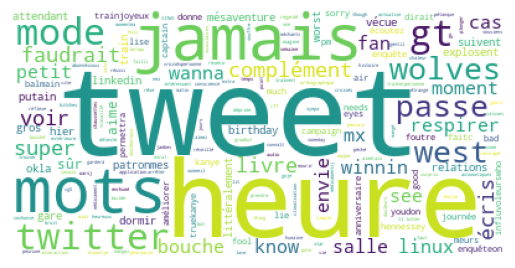

In [34]:
wordcloud = WordCloud(background_color = 'white', max_words = 2000).generate(res)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [119]:
from textblob import TextBlob
def processing(text):
    return TextBlob(text).words

'je pense qu\'on ne m\'aime pas, mais je ne suis pas sûr 🤣 https://t.co/dk5WPoK9J1 Chat GPT, Google Bard… : l’intelligence artificielle va-t-elle nous remp... https://t.co/PrWWCjaZKN j\'ai drop quelques projets sur mon github, dans mes langues les plus utilisées j\'ai 70% de CSS 🙄 https://t.co/4UIVtJrAUQ j\'ai regardé inception lors d\'un déplacement pro, j\'ai dû mettre pause plusieurs fois, ce qui est assez chiant, je veux le regarder en one shot ! j\'ai perdu l\'habitude d\'aller au cinéma tous les dimanches soir je ne suis pas sûr d’avoir mangé aujourd’hui et j’y pense seulement maintenant 😔 bien sûr, pourquoi pas tant qu’on y est, trouvons des excuses au racisme https://t.co/j6zsy2uQVp je considère que "se nourrir" n’est pas un fait intéressant, si cela ne tenait qu’à moi, ce serait optionnel je suis en train de me demander depuis tout à l\'heure pourquoi je crève de faim, alors qu\'en fait, il est bientôt 22h et je n\'ai toujours rien mangé  😓 il est approximativement 04:30, je s

In [121]:
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(TextBlob(" ".join(df['tweets_txt'])).words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object